<a href="https://colab.research.google.com/github/supriyameduri9/CMPE255_Assignments/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means from Scratch

K-Means clustering algorithm is a unsupervised machine learning algoirthm. It is used to bucket the features which are not labelled based on the similar observations.

To implement K-Means clustering algorithm from scratch, the following steps are followed

1. Randomly pick K data points as our initial centroids
2. Based on the centroids assign each observation to a cluster
3. Find out the mean coordinates for each cluster to be considered as new cluster
4. Reassign clusters based on new centroids
5. Repeat steps 3 and 4 until optimized(centroids not moving)

For this I am using [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris).



#### Import Dependencies

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import numpy.matlib
from random import randrange
from sklearn.datasets import load_iris 


from scipy.spatial.distance import cdist

#### Mounting Google Drive

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load Iris dataset from drive

In [23]:
iris = pd.read_csv('/content/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data = iris.iloc[1:,0:4]
data_array = np.asarray(data, dtype=float)
# iris_data

iris_labels = data.iloc[1:, 3]
iris_labels

# iris_data = np.asarray(iris[1:,0:4], dtype=float)
# iris_labels = iris[1:,4]

In [40]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
5,6,5.4,3.9,1.7
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


#### Function to calculate distance 

In [26]:
def find_distance(p1, p2):
	dis = sum((p1 - p2)**2)**0.5
	return dis

#### Function to assign each centroid to a cluster

In [32]:
def assign_clusters(centroids, data_array):
    clusters = []
    shape = data_array.shape[0]
    print(shape)
    for i in range(shape):
        distances = []
        for centroid in centroids:
            temp_distance = find_distance(centroid, data_array[i])                              
            distances.append(temp_distance)
        single = [i for i, val in enumerate(distances) if val==min(distances)]
        clusters.append(single[0])
    return clusters

#### Function to calculate centroids

In [ ]:
def calc_centroids(clusters, data_array):
    new_centroids = []
    df = pd.concat([pd.DataFrame(data_array),pd.DataFrame(clusters, columns=['single'])],axis=1)
    for c in set(df['single']):
        current_cluster = df[df['single']\==c][df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

#### Function to calculate centroid variance

In [ ]:
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

#### Apply the functions to the dataset

In [ ]:
k = 4
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

#### Visualization

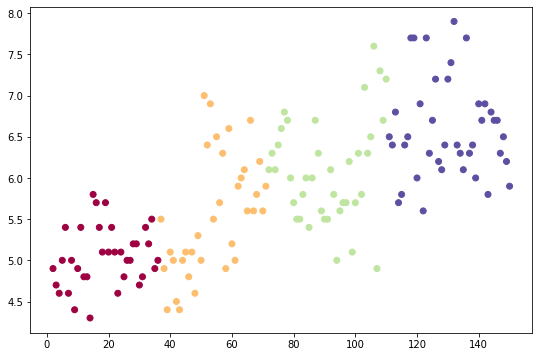

In [39]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);

plt.savefig('final_clusters', bpi=150)

#### References : K-Means algorithm from Scratch


1.   List item
2.   List item



## Hierarchial Clustering

We use the same iris dataset. 



#### Data preparation for cluster analysis

Scaling the dataset to a standard deviation of 1

In [34]:
from scipy.cluster.vq import whiten
scaled_data = whiten(data.to_numpy())

In [35]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3
count,149.000000,149.000000,149.000000,149.000000
mean,1.766964,7.081932,7.061833,2.152260
std,1.003373,1.003373,1.003373,1.003373
min,0.046499,5.207016,4.629182,0.570211
25%,0.906732,6.175763,6.480855,0.912338
50%,1.766964,7.023417,6.943774,2.508929
75%,2.627197,7.749977,7.638151,2.908077
max,3.487429,9.566378,10.184201,3.934457


#### Use dendogram to decide the number of clusters

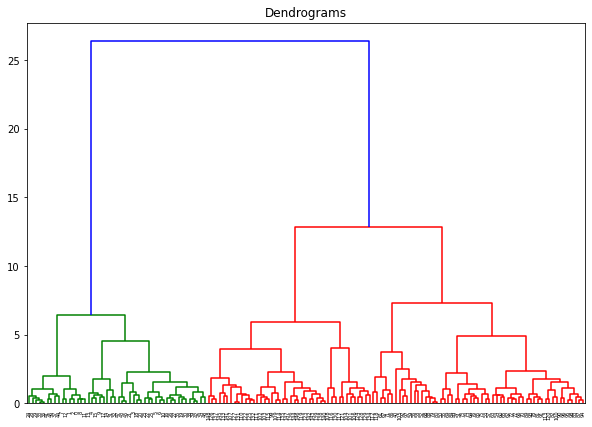

In [37]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

#### From the above dendogram, we can consider the number of clusters as 3. Apply hierarchial clustering for 3 clusters

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaled_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In the above we see three values 0,1,2 which represent the 3 clusters identified.

1.  Cluster 1 --> 0
2.  Cluster 2 --> 1
3. Cluster 3 --> 2



#### Visualization

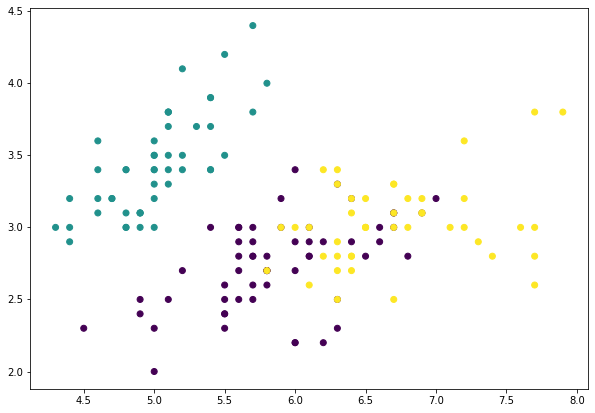

In [46]:
plt.figure(figsize=(10, 7))  
# plt.scatter(scaled_data[0], scaled_data[1], c=scaled_data['cluster.labels_'])

plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=cluster.labels_)



In the above plot we can clearly identify the three clusters forme

#### References : Hierarchial Clustering

1.   https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
2.   https://medium.com/swlh/hierarchical-clustering-in-python-9646cfddee35



## Gaussian Mixture Models Clustering


It is used to cluster unlabeled data, having advantages over k-means algorithm.

1. GMM handles very oblong clusters
2. GMM provides us with the probabilities that a given data point belongs to a possible cluster



### Feature Scaling

To transform the data and normalize the features in a dataset into a finite range

In [59]:
from sklearn import preprocessing
import matplotlib as mpl


scaler = preprocessing.StandardScaler()

scaler.fit(data)
X_scaled_array = scaler.transform(data)
X_scaled = pd.DataFrame(X_scaled_array, columns = data.columns)

X_scaled.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
90,0.371992,0.304765,-0.118060,0.470711
20,-1.255474,-0.906169,1.502154,-1.296943
120,1.069478,-0.300702,-0.580978,0.641775
17,-1.325223,-0.179608,1.733613,-1.182901
108,0.790484,1.636793,1.270695,1.326028


### Principal Component Analysis

We reduce the features based on Principal Component Analysis. 


In [50]:
from sklearn.decomposition import PCA

ndimensions = 2
seed = 0

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
30,-1.837933,0.415654
74,0.714810,0.295379
4,-2.435051,1.466645
97,-0.069939,-1.557481
132,1.638463,-0.239434


In [57]:
# y_id_array = pd.Categorical.from_array(iris['Species']).codes

df_plot = X_pca.copy()
df_plot.sample(5)

,PC1,PC2
70,0.347336,-0.392119
55,0.184513,0.780021
3,-2.601806,0.624070
140,1.920651,0.694966
29,-1.996619,-0.513788


In [52]:
from sklearn.mixture import GaussianMixture

nclusters = 3
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Function for plotting graph

In [65]:
def plotData(df, groupby):
    
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')

    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                    #  label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    

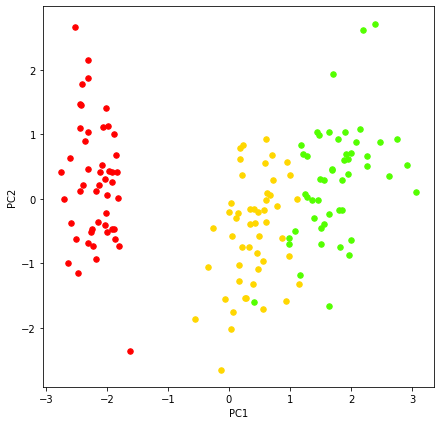

In [66]:
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

### References : Gaussian Mixture Model

https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering

## DBSCAN Clustering

Used as an alternative to K-Means clustering algorithm, where we need not provide initial number of  clusters, but tune two other parameters called eps and min_samples parameters.

1.   Eps parameter is the maximum distance between two data points to be considered in the same neighborhood.

2.  The min_sample parameter is the minimum amount of data points in a neighborhood to be considered a cluster.

These parameters are necessary to find out the density of each cluster.

#### Create an instance of DB Scan

In [68]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

In [71]:
Y_preds = dbscan.fit_predict(X_pca_array)
Y_preds

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

#### Evaluating performance of DB Scan

In [83]:
db = DBSCAN(eps=0.5, min_samples=5, )
pred = db.fit_predict(X_pca_array)

pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

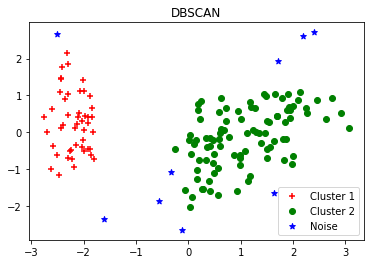

In [86]:
for i in range(0, X_pca_array.shape[0]):
  if db.labels_[i] == 0:
    c1 = plt.scatter(X_pca_array[i,0],X_pca_array[i,1],c='r', marker='+')
  elif db.labels_[i] == 1:
    c2 = plt.scatter(X_pca_array[i,0],X_pca_array[i,1],c='g',
    marker='o')
  elif db.labels_[i] == -1:
    c3 = plt.scatter(X_pca_array[i,0],X_pca_array[i,1],c='b',
    marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
plt.title('DBSCAN')
plt.show()

### References : DB Scan Clustering


1.   https://www.dummies.com/programming/big-data/data-science/how-to-create-an-unsupervised-learning-model-with-dbscan/
2.   https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-clustering-dbscan

